In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import time
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *
from tabulate import tabulate
print 'finished3'

finished3


In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[num_test/2:], newsgroups_test.target[num_test/2:]
mini_test_data, mini_test_labels = newsgroups_test.data[:5], newsgroups_test.target[:5]

dev_data, dev_labels = newsgroups_test.data[:num_test/2], newsgroups_test.target[:num_test/2]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print 'training label shape:', train_labels.shape
print 'test label shape:', test_labels.shape
print 'dev label shape:', dev_labels.shape
print 'labels names:', newsgroups_train.target_names

training label shape: (2034L,)
test label shape: (677L,)
dev label shape: (676L,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


In [123]:
#1********************
for i in range(0, 5): print "LABEL IS:",train_labels[i],"\nTEXT IS:\n", train_data[i]

In [124]:
#2A)*********************
clf = CountVectorizer()
x = clf.fit_transform(train_data)
print "Vocabulary size is ", x.shape[1]
CVmean = np.mean(x.getnnz(axis=1))
print "Average number of non zero tokens across all data entries ==", CVmean
print "fraction of matrix/dictionary that is non-zero is very small == ", CVmean/x.shape[1]
words = clf.get_feature_names()

#2B)*********************
print 'first word is: ', words[0]
print 'last word is: ', words[x.shape[1]-1]

#2C)*********************
mywords = ["atheism", "religion", "graphics", "space"]
myClf = CountVectorizer()
mytrans = myClf.fit_transform(mywords)
mine = myClf.transform(train_data)
print mine.shape
myMean = np.mean(mine.getnnz(axis=1))
print "Average number of non zero tokens across my dictionary ==", myMean
print "Fraction of my matrix/dictionary that is non-zero ==", CVmean/mine.shape[1]

#code to cross check the mean**************
# eachrow=[]
# for i in range(0, 2034):
#     #print x[i].shape
#     eachrow.append(x[i].getnnz())
#     #print x[i].getnnz()
# print "mean is equal to: ", np.mean(eachrow)

Vocabulary size is  26879
Average number of non zero tokens across all data entries == 96.7059980334
fraction of matrix/dictionary that is non-zero is very small ==  0.00359782722696
first word is:  00
last word is:  zyxel
(2034, 4)
Average number of non zero tokens across my dictionary == 0.268436578171
Fraction of my matrix/dictionary that is non-zero == 24.1764995084


In [125]:
#2D)***********************
# Ngrams, even at 2, significantly increase the vocabulary
print "\nNGram Range = 1:"
clf = CountVectorizer(ngram_range=(1, 1))
x = clf.fit_transform(train_data)
print 'vocabulary size is ', x.shape[1]

print "\nNGram Range = 2:"
clf = CountVectorizer(ngram_range=(1, 2))
x = clf.fit_transform(train_data)
print 'vocabulary size is ', x.shape[1]

print "\nNGram Range = 3:"
clf = CountVectorizer(ngram_range=(1, 3))
x = clf.fit_transform(train_data)
print 'vocabulary size is ', x.shape[1]


NGram Range = 1:
vocabulary size is  26879

NGram Range = 2:
vocabulary size is  221770

NGram Range = 3:
vocabulary size is  537462


In [126]:
#2D)***********************
# the char_wb analyzer, which creates ngrams from only within word boundaries 
# makes a small vocab for smaller ngrams (less perumatations that occur repeatedly 
# in english languae) and larger for larger ngrams (more permutations)
print "\nChar_WB = 1,2:"
clf = CountVectorizer(analyzer='char_wb', ngram_range=(1, 2))
x = clf.fit_transform(train_data)
print 'vocabulary size is ', x.shape[1]

print "\nChar_WB = 2,2:"
clf = CountVectorizer(analyzer='char_wb', ngram_range=(2, 2))
x = clf.fit_transform(train_data)
print 'vocabulary size is ', x.shape[1]

print "\nChar_WB = 3,3:"
clf = CountVectorizer(analyzer='char_wb', ngram_range=(3, 3))
x = clf.fit_transform(train_data)
print 'vocabulary size is ', x.shape[1]

print "\nChar_WB = 4,4:"
clf = CountVectorizer(analyzer='char_wb', ngram_range=(4, 4))
x = clf.fit_transform(train_data)
print 'vocabulary size is ', x.shape[1]

print "\nChar_WB = 5,5:"
clf = CountVectorizer(analyzer='char_wb', ngram_range=(5, 5))
x = clf.fit_transform(train_data)
print 'vocabulary size is ', x.shape[1]


Char_WB = 1,2:
vocabulary size is  3167

Char_WB = 2,2:
vocabulary size is  3090

Char_WB = 3,3:
vocabulary size is  25864

Char_WB = 4,4:
vocabulary size is  75940

Char_WB = 5,5:
vocabulary size is  118537


In [231]:
#2E)**Prune words that are not in at least 10 docs  ******************************
clf = CountVectorizer(min_df=10)
x = clf.fit_transform(train_data)
print "After pruning words not in at least 10 docs, train data has this many words: ", x.shape[1]

After pruning words not in at least 10 docs, train data has this many words:  3064


In [229]:
#2F)****Difference in vocab sizes, train vs. dev data ***************************
clf = CountVectorizer()
x = clf.fit_transform(train_data)
print "train data has this many words: ", x.shape[1]
clf = CountVectorizer()
y = clf.fit_transform(dev_data)
print "dev data has this many words: ", y.shape[1]
print "train has this many more words: ", x.shape[1]-y.shape[1]

train data has this many words:  26879
dev data has this many words:  16246
train has this many more words:  10633


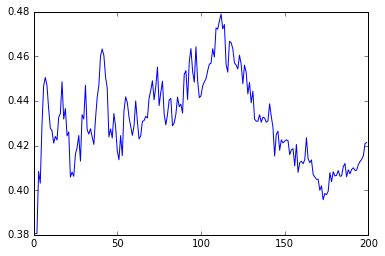

max score= 0.478882866053 when k=  112


In [129]:
#3) KNN ********************************
# KNN doesn't work well because most texts share most of the same words, and only 
# a few words differentiate one topic from another
# This is similar to the confusion in the MNIST data where numbers 4, 9 and 2, 8
# were confused ==> they don't have enough distinct features to clearly differentiate
clf = CountVectorizer()
x = clf.fit_transform(train_data)
xdev = clf.transform(dev_data)
scores =[]
k = []
maxscore =0
for i in range(1, 200):
    k.append(i)
    clfKNN = KNeighborsClassifier(n_neighbors=i)
    clfKNN.fit(x, train_labels)
    preds = clfKNN.predict(xdev)
    score = metrics.f1_score(dev_labels, preds, average='weighted')
    #print score
    scores.append(score)
    if score > maxscore: 
        maxscore = score
        index=i    
plt.plot(k, scores)
plt.show()
print 'max score=', maxscore, 'when k= ', index

In [140]:
# 3) MulitnomialNB: grid search for best alpha*************
clf = CountVectorizer()
x = clf.fit_transform(train_data)
xdev = clf.transform(dev_data)
scores =[]
k = []
parameters = {'alpha': [0.000, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
clf = GridSearchCV(MultinomialNB(), parameters)
clf.fit(x, train_labels)
for i in range(0, len(clf.grid_scores_)):
    print clf.grid_scores_[i]

mean: 0.30629, std: 0.00552, params: {'alpha': 0.0}
mean: 0.82547, std: 0.00573, params: {'alpha': 0.0001}
mean: 0.82596, std: 0.00400, params: {'alpha': 0.001}
mean: 0.82842, std: 0.00651, params: {'alpha': 0.01}
mean: 0.82203, std: 0.01419, params: {'alpha': 0.1}
mean: 0.80875, std: 0.01414, params: {'alpha': 0.5}
mean: 0.79597, std: 0.01909, params: {'alpha': 1.0}
mean: 0.77384, std: 0.01863, params: {'alpha': 2.0}
mean: 0.68437, std: 0.02005, params: {'alpha': 10.0}


C:\Users\IBM_ADMIN\Anaconda2\lib\site-packages\sklearn\naive_bayes.py:664: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)


In [141]:
#3) Logistic regression, find optimal value of C
# Use grid search
# Logistic regression does not work as well as NB because of different objectives 
# NB assigns each feature distinct probability correlated with frequency
# whereas LogRegr attempts to minimize errors by generating estimate
# weights across all features. This minimizes the impact of words that are 
# distinct/relevant to a specific class of news topic
clf = CountVectorizer()
x = clf.fit_transform(train_data)
xdev = clf.transform(dev_data)
regr = LogisticRegression()
regr.fit(x, train_labels)
print 'logistic regr score: ', regr.score(xdev, dev_labels)

parameters = {'C': [0.01, 0.1, 0.5, 1.0, 2.0, 10.0, 100.0]}
clf = GridSearchCV(LogisticRegression(), parameters)
clf.fit(x, train_labels)
for i in range(0, len(clf.grid_scores_)):
    print clf.grid_scores_[i]

logistic regr score:  0.699704142012
mean: 0.73402, std: 0.00750, params: {'C': 0.01}
mean: 0.76647, std: 0.00299, params: {'C': 0.1}
mean: 0.77139, std: 0.00337, params: {'C': 0.5}
mean: 0.76303, std: 0.00306, params: {'C': 1.0}
mean: 0.76254, std: 0.00448, params: {'C': 2.0}
mean: 0.75320, std: 0.00062, params: {'C': 10.0}
mean: 0.74975, std: 0.00438, params: {'C': 100.0}


In [139]:
#3C  Logistic Regression compare C value to coef_ squared *********
clf = CountVectorizer()
x = clf.fit_transform(train_data)
xdev = clf.transform(dev_data)
regr = LogisticRegression()
regr.fit(x, train_labels)
print 'logistic regr score: ', regr.score(xdev, dev_labels)
print 

# Obviously sum of squares increases with C.
# But for the optimal C value (based on the grid search above, C= ~0.5)
# the sum of the coefficients squared at that value of C, is closest to the average 
# number of non-zero tokens for the entire corpus

clf = CountVectorizer()
x = clf.fit_transform(train_data)
xdev = clf.transform(dev_data)        
Cvalues=[0.01, 0.1, 0.5, 1.0, 2.0, 10.0, 100.0]
scores = []
for i in range(0, len(Cvalues)):    
    regr = LogisticRegression(penalty='l1', tol = 0.01, C=Cvalues[i])
    regr.fit(x, train_labels)
    allcoef = map(lambda x: np.sum(np.square(regr.coef_[x])),[0,1,2,3])
    scores.append(allcoef)

for i in range(0, len(Cvalues)):  
    print 'for C value == ', Cvalues[i], 'the 4 coef squared are:' 
    for j in range(0,4):
        print scores[i][j]

logistic regr score:  0.699704142012

for C value ==  0.01 the 4 coef squared are:
0.0112213844262
0.195811353216
0.341946678825
0.0168496947597
for C value ==  0.1 the 4 coef squared are:
5.65807705863
12.6594418991
10.2887959959
4.46947852096
for C value ==  0.5 the 4 coef squared are:
62.2325192372
63.0207267625
55.9891650214
53.2229374477
for C value ==  1.0 the 4 coef squared are:
173.935308315
114.673169697
123.464703362
132.155194122
for C value ==  2.0 the 4 coef squared are:
385.444488356
207.153538146
321.515410377
313.927054611
for C value ==  10.0 the 4 coef squared are:
1047.17465506
735.038792014
889.653095507
971.995446525
for C value ==  100.0 the 4 coef squared are:
3424.66902027
3222.07987749
3638.80550815
3180.67780003


In [15]:
#4 Top Words*******************************
clf = CountVectorizer()
x = clf.fit_transform(train_data)
regr = LogisticRegression()
regr.fit(x, train_labels)

myFeat = clf.get_feature_names()
h =[]
for i in range(0,4): h.append(newsgroups_train.target_names[i])
eachsubject = []
topwords =[]
for i in range(0, 4):
    eachsubject.append(sorted(range(len(regr.coef_[i])), key=lambda j:regr.coef_[i][j])[-5:])
    print 'top words for ', h[i], ':'
    for k in range (0, 5):
        print myFeat[eachsubject[i][k]]
    #topwords.append(np.argpartition(regr.coef_[i], -5)[-5:]) also works
    topwords.append(sorted(range(len(regr.coef_[i])), key=lambda j:regr.coef_[i][j])[-5:])

matrixList=[]
eachrow=[]
for i in range(0, 4):
    for j in range(0, 5):
        eachrow.append(myFeat[topwords[i][j]])
        for k in range(0, 4):
            eachrow.append(round(regr.coef_[k][topwords[i][j]], 2))            
matrixList.append(eachrow)
myheader = ['feature', h[0],h[1],h[2],h[3]]
a=np.array(matrixList).reshape(20,5)
print tabulate(a, headers=myheader, tablefmt="simple")


top words for  alt.atheism :
atheism
religion
bobby
atheists
deletion
top words for  comp.graphics :
computer
3d
file
image
graphics
top words for  sci.space :
spacecraft
launch
nasa
orbit
space
top words for  talk.religion.misc :
order
fbi
blood
christian
christians
feature       alt.atheism    comp.graphics    sci.space    talk.religion.misc
----------  -------------  ---------------  -----------  --------------------
atheism              0.94            -0.41        -0.45                 -0.43
religion             0.95            -0.62        -0.79                 -0.06
bobby                0.99            -0.22        -0.34                 -0.46
atheists             1.03            -0.1         -0.32                 -0.84
deletion             1.12            -0.4         -0.42                 -0.4
computer             0.14             0.98        -0.68                 -0.49
3d                  -0.36             1.12        -0.7                  -0.38
file                -0.33      

In [16]:
#4 Top Words Bigrams
# The bigrams are surprising because they don't involve the most common/top words at all
# which we might intuitively expect
# Most of the top bi-grams are everyday phrases..'you are', 'was just', 
# 'out there', 'is there', 'and such', etc
clf = CountVectorizer(ngram_range=(2, 2))
x = clf.fit_transform(train_data)
regr = LogisticRegression()
regr.fit(x, train_labels)

myFeat = clf.get_feature_names()
h =[]
for i in range(0,4): h.append(newsgroups_train.target_names[i])
eachsubject = []
topwords =[]
for i in range(0, 4):
    eachsubject.append(sorted(range(len(regr.coef_[i])), key=lambda j:regr.coef_[i][j])[-5:])
    print 'top words for ', h[i], ':'
    for j in range (0, 5):
        print myFeat[eachsubject[i][j]]
    #topwords.append(np.argpartition(regr.coef_[i], -5)[-5:])
    topwords.append(sorted(range(len(regr.coef_[i])), key=lambda j:regr.coef_[i][j])[-5:])


matrixList=[]
eachrow=[]
for i in range(0, 4):
    for j in range(0, 5):
        eachrow.append(myFeat[topwords[i][j]])
        for k in range(0, 4):
            eachrow.append(round(regr.coef_[k][topwords[i][j]], 2))            
matrixList.append(eachrow)
myheader = ['feature', h[0],h[1],h[2],h[3]]
a=np.array(matrixList).reshape(20,5)
print tabulate(a, headers=myheader, tablefmt="simple")


top words for  alt.atheism :
you are
look up
cheers kent
was just
claim that
top words for  comp.graphics :
out there
is there
in advance
comp graphics
looking for
top words for  sci.space :
sherzer methodology
and such
sci space
the moon
the space
top words for  talk.religion.misc :
is strength
the fbi
compuserve com
such lunacy
ignorance is
feature                alt.atheism    comp.graphics    sci.space    talk.religion.misc
-------------------  -------------  ---------------  -----------  --------------------
you are                       0.57            -0.32        -0.58                  0
look up                       0.63            -0.24        -0.2                  -0.17
cheers kent                   0.65            -0.88        -0.82                  0.6
was just                      0.68            -0.19        -0.2                  -0.3
claim that                    0.77            -0.26        -0.35                 -0.2
out there                    -0.32             0.9  

In [119]:
def emptyprocessor(s):
    return s

def mypreproc(s):
    s = s.lower()
    s = re.sub('\b\w{7,50}\b', ' i ', s)
    s = re.sub('[\w\.-]+@[\w\.-]+', ' i ',s)
    s= re.sub('\_\w+', ' i ', s)
    s= re.sub('\w+\_', ' i ', s)
    s = re.sub('[\w+]+\_+[\w+]+', ' i ', s)
    s = re.sub('[\_+]+\w+[\_+]+', ' i ', s)    
    s = re.sub('[\w-]+\d+[\w-]+', ' i ', s)    
    s = re.sub('[\d-]+\w+[\d-]+', ' i ', s)    
    s = re.sub('[\d]+\w+', ' i ', s)  
    s = re.sub('[\w+]+_+[\w+]+', ' i ', s)  
    s = re.sub('[\_+]+\w+[\_+]+', ' i ', s) 
    s = re.sub('[_+]+\w+[_+]+', ' i ', s) 
    s = re.sub('\d+', ' i ', s)
    s = re.sub('[.]+\w+', ' i ', s)       
    return s

def mypreproc2(s):
    s = s.lower()
#   s = re.sub('\b\w{7,50}\b', ' i ', s) Do not remove words larger than 7
    s = re.sub('[\w\.-]+@[\w\.-]+', ' i ',s)
    s= re.sub('\_\w+', ' i ', s)
    s= re.sub('\w+\_', ' i ', s)
    s = re.sub('[\w+]+\_+[\w+]+', ' i ', s)
    s = re.sub('[\_+]+\w+[\_+]+', ' i ', s)    
    s = re.sub('[\w-]+\d+[\w-]+', ' i ', s)    
    s = re.sub('[\d-]+\w+[\d-]+', ' i ', s)    
    s = re.sub('[\d]+\w+', ' i ', s)  
    s = re.sub('[\w+]+_+[\w+]+', ' i ', s)  
    s = re.sub('[\_+]+\w+[\_+]+', ' i ', s) 
    s = re.sub('[_+]+\w+[_+]+', ' i ', s) 
    s = re.sub('\d+', ' i ', s)
    s = re.sub('[.]+\w+', ' i ', s)       
    return s

In [121]:
#5) Preprocessor  ************************** 
# Empty preprocessor makes the vocabulary larger (without significantly impacting scores)
# because it overrides default string processing stage, which has built-in features for punctuation 
# other spurious characters
# Preprocessor removes:
#  Numbers, numbers tied to strings, and vice versa
#  Underscore and undercores tied to strings and vice versa
#  email addresses
# Could only improve the score 1 basis point even when removing words over 7 chars

avg_f1score = []
avg_score = []
names = ['default', 'empty', 'preprocessor #1', 'preprocessor #2']
vectorizers =[]
vectorizers.append(CountVectorizer())
vectorizers.append(CountVectorizer(preprocessor=emptyprocessor))
vectorizers.append(CountVectorizer(preprocessor=mypreproc, stop_words='english')) 
vectorizers.append(CountVectorizer(preprocessor=mypreproc2, stop_words='english'))

for i in range(0, 4):
    for j in range(0, 10):            
        clf = vectorizers[i]
        x = clf.fit_transform(train_data)
        xdev = clf.transform(dev_data)
        regr = LogisticRegression()
        regr.fit(x, train_labels)
        preds = regr.predict(xdev)
        avg_f1score.append(metrics.f1_score(dev_labels, preds, average='weighted'))
        avg_score.append(regr.score(xdev, dev_labels))
    print names[i], ':'
    print 'vocabulary size =', x.shape[1]
    print 'avg f1 score:', sum(avg_f1score)/len(avg_f1score)
    print 'avg score:',sum(avg_score)/len(avg_score)
    print



default :
vocabulary size = 26879
avg f1 score: 0.694417287185
avg score: 0.699704142012

empty :
vocabulary size = 33291
avg f1 score: 0.69837564797
avg score: 0.703402366864

preprocessor #1 :
vocabulary size = 22706
avg f1 score: 0.703642237957
avg score: 0.709072978304

preprocessor #2 :
vocabulary size = 22706
avg f1 score: 0.706275532951
avg score: 0.711908284024



In [13]:
#6) *****************Logistic regression with L1************ 
# ***************** vs L2 ************ 
# Number of non-zero values for l1 regularization is much smaller than the 
# non zero number for l2,
# because in l2 regularization all values are non-zero (but relatively small)
clf = CountVectorizer()
x = clf.fit_transform(train_data)
xdev = clf.transform(dev_data)
regr = LogisticRegression(penalty='l1')
regr.fit(x, train_labels)
print 'logistic regr score l1: ', regr.score(xdev, dev_labels)
for i in range(0, 4):
    print 'for class', newsgroups_train.target_names[i],'non zero weights =', np.count_nonzero(regr.coef_[i])    
print
print
clf = CountVectorizer()
x = clf.fit_transform(train_data)
xdev = clf.transform(dev_data)
regr = LogisticRegression(penalty='l2')
regr.fit(x, train_labels)
print 'logistic regr score l2:', regr.score(xdev, dev_labels)
for i in range(0, 4):
    print 'for class', newsgroups_train.target_names[i],'non zero weights =', np.count_nonzero(regr.coef_[i])    

logistic regr score l1:  0.686390532544
for class alt.atheism non zero weights = 436
for class comp.graphics non zero weights = 461
for class sci.space non zero weights = 391
for class talk.religion.misc non zero weights = 376


logistic regr score l2: 0.699704142012
for class alt.atheism non zero weights = 26879
for class comp.graphics non zero weights = 26879
for class sci.space non zero weights = 26879
for class talk.religion.misc non zero weights = 26879


c-value is:  0.01
new vocab size is:  20
Retrained l2 logistic regr score is:  0.488165680473
c-value is:  0.1
new vocab size is:  215
Retrained l2 logistic regr score is:  0.693786982249
c-value is:  0.25
new vocab size is:  441
Retrained l2 logistic regr score is:  0.681952662722
c-value is:  0.5
new vocab size is:  729
Retrained l2 logistic regr score is:  0.677514792899
c-value is:  0.75
new vocab size is:  945
Retrained l2 logistic regr score is:  0.671597633136
c-value is:  10
new vocab size is:  2446
Retrained l2 logistic regr score is:  0.704142011834
c-value is:  25
new vocab size is:  4603
Retrained l2 logistic regr score is:  0.695266272189
c-value is:  50
new vocab size is:  5878
Retrained l2 logistic regr score is:  0.69674556213
c-value is:  75
new vocab size is:  6942
Retrained l2 logistic regr score is:  0.701183431953
c-value is:  100
new vocab size is:  7741
Retrained l2 logistic regr score is:  0.699704142012
c-value is:  250
new vocab size is:  13564
Retrained l2 lo

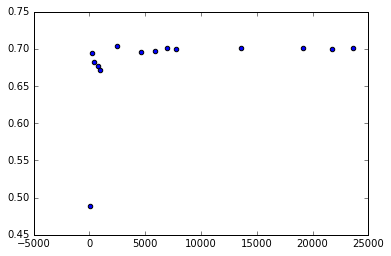

finished


In [12]:
#6) *******Prune L1 Logit with different values of C, create a new dictionary
# Use new dictionary to score Logit using L2
# After running the code below about 5 times, C = ~10 yields the max score 
# for most efficient(minimum)vocabulary, about 2500 words
np.random.seed(0)    
listofscores =[]
vocabsizes =[]
cvalues = [0.01,0.1,0.25,0.5,0.75,10,25,50,75,100,250,500,750,1000]
mydict = {}
clf = CountVectorizer()
x = clf.fit_transform(train_data)
vocab = clf.vocabulary_
words=clf.get_feature_names()
for i in range(0, len(cvalues)):
    regr = LogisticRegression(penalty='l1', tol=0.01, C=cvalues[i])
    regr.fit(x, train_labels) 
    uniquenp = np.unique(np.nonzero(map(lambda x: (regr.coef_[x]),[0,1,2,3])))
    print 'c-value is: ', cvalues[i]
    print 'new vocab size is: ', uniquenp.shape[0]
    vocabsizes.append(uniquenp.shape[0])
    mydict = {}
    for j in range(0, uniquenp.shape[0]): 
        mydict.update({words[uniquenp[j]]:j})     
    clf2 = CountVectorizer(vocabulary=mydict)
    x2 = clf2.fit_transform(train_data)
    xdev = clf2.transform(dev_data)
    regr2 = LogisticRegression(penalty='l2')#default is l2
    regr2.fit(x2, train_labels)
    score = regr2.score(xdev, dev_labels)
    listofscores.append(score)
    print 'Retrained l2 logistic regr score is: ', score

plt.scatter(vocabsizes, listofscores)
plt.show()            
print 'finished'

In [8]:
# 7)***********************
# TDIDFVectorizer weights words by how often they appear in a document and
# weights that against the frequency of the word in the entire corpus thereby
# offseting high weights for words common to the corpus

# Create list of all correct predictions to sort to find 
# largest value of (Max prob) / (prob of the correct prediction) 
# i.e. we are technically looking for smallest probability for a correct prediction


# Analyzing the top 3 docucuments that scored the highest for ratio of:
#  Max_Prob/(Prob for a correct prection)
# first 2 miscoded docs used "FTP" and "Email" and were classified as graphics instead of religion (correct label)
#  One issue is that words used in atheism and religion are closely related in general as related topics
#  Another issue with the 2nd & 3rd document is the short length (which can't be controlled for but poses a challenge)

#  One way to improve the scoring is to use the L1 penalty, assigning absolute weights
#  to more clearly distinguish words characteristic of a class

# And if documents could be correlated to authors/email addresses
# it would give better insight on what the topic might be

# In running the reverse test, (commented out below) , the results show
# top documents are very long document lengths, high word frequencies which 
# increases the probability of words characteristic of the given class

maxscore=0
otherscores=[]
clf = TfidfVectorizer()
x = clf.fit_transform(train_data)
xdev = clf.transform(dev_data)
regr = LogisticRegression(C=100.0)
regr.fit(x, train_labels)
preds = regr.predict(xdev)
probs= regr.predict_proba(xdev)
maxprob = 0
mycounter = 0
incorrect = []
for prob in probs:
    if max(prob) > maxprob:
        maxprob = max(prob)
print 'max prob is:', maxprob        
print maxprob
#Create list of all correct predictions to sort to find 
# largest value of (Max prob) / (prob of the correct prediction) 
# i.e. we are technically looking for smallest probability for a correct prediction
# capture index of dev_data as counter, label, and proability of this prediction 
print 'the counter', mycounter
for pred, prob, label in zip(preds, probs, dev_labels):
    if pred != label:
        incorrect.append([mycounter, pred, label, max(prob)/prob[label]])
    mycounter+=1

sortedlist = sorted(incorrect, key=lambda oneitem: oneitem[3], reverse=True)
for i in range (0,3):
    print '\n\nPredicted label:' ,newsgroups_train.target_names[sortedlist[i][1]]
    print '\n\nCorrect label:' ,newsgroups_train.target_names[sortedlist[i][2]]
    print '\n\nIndex:' ,sortedlist[i][0]    
    print '\nMagnitude of folly', sortedlist[i][3]
    print dev_data[sortedlist[i][0]]
        
# Check reverse list 
# Results show very long document lengths, high word frequencies

# sortedlist = sorted(correct, key=lambda oneitem: oneitem[2], reverse=True)
# for i in range (0,3):
#     print '\n\nCorrect label:' ,sortedlist[i][1]
#     print '\n\nIndex:' ,sortedlist[i][0]    
#     print '\nProbability', sortedlist[i][2]
#     print dev_data[sortedlist[i][0]]


max prob is: 0.999978715534
0.999978715534
the counter 0


Predicted label: comp.graphics


Correct label: talk.religion.misc


Index: 215

Magnitude of folly 929.344142051
I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this is a
not-for-profit endeavor. This is a copyrighted work, but people are welcome
to make *verbatim* copies for personal use. People can recuperate the
actual costs of printing (paper, copy center charges), but may not charge
anyth